In [194]:
import torch
import numpy as np
from model import ODEBlock
from torchdiffeq import odeint
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'


In [195]:
# load model and dataset
t = torch.load("./data/t.pth")
X = torch.load("./data/X_Faultline069070.pth")
dim = X.shape[-1]
generator_nodes = np.load("./data/Generator_nodes.npy")

In [235]:
generator_nodes

array([ 10,  12,  25,  26,  31,  46,  49,  54,  59,  61,  65,  66,  69,
        80,  87,  89, 100, 103, 111])

In [197]:
X.shape

torch.Size([10, 901, 38])

In [198]:
def getTestdata(X, FaultDuration = 50):
    if FaultDuration<50 or FaultDuration > 500:
        raise ValueError("Fault Duration out of range.")
    return X[int(FaultDuration/50)-1, ...]

# Evaluation

In [199]:
FaultDuration = 100
model_ode= ODEBlock(dim,1000,dim)
model_ode.load_state_dict(torch.load("result/model/ODEBlock_Faultline110112.pth"))
X_test = getTestdata(X, FaultDuration=FaultDuration)
X0_test = X_test[0, :]
X_test_hat =odeint(model_ode, X0_test, t, method='dopri5').detach()

In [200]:
X_test_hat.shape, X_test.shape

(torch.Size([901, 38]), torch.Size([901, 38]))

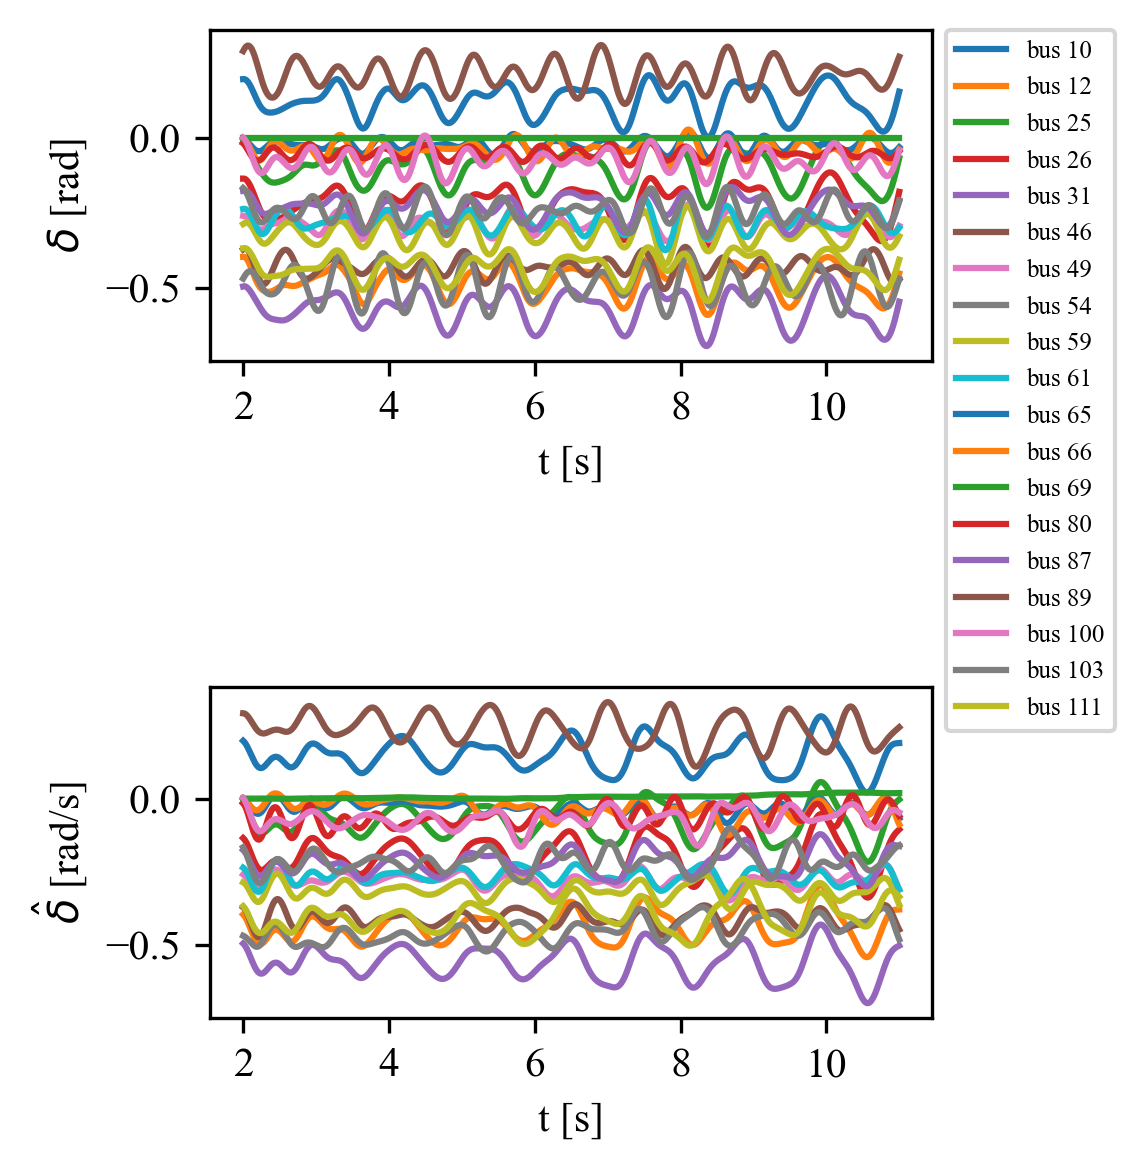

: 

In [238]:
plt.figure(figsize=(4,4),dpi=300)
node = 14

plt.subplot(2,1,1)
for i in range(19):
    plt.plot(t, X_test[:,2*i], label = "bus {}".format(generator_nodes[i]))
plt.xlabel("t [s]")
plt.ylabel("$\delta$ [rad]")
# plt.ylim(-1, 1)
# plt.legend(fontsize=7, loc = "upper center")
plt.legend(fontsize=6, bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0)


plt.subplot(2,1,2)
for i in range(19):
    plt.plot(t, X_test_hat[:,2*i])
plt.xlabel("t [s]")
plt.ylabel("$\hat{\delta}$ [rad/s]")
plt.tight_layout()

plt.savefig("./result/test result/traj_gen.jpg")